<a href="https://colab.research.google.com/github/korede05/MSL_25/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:



from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import svm

#load dataset

iris = datasets.load_iris()

iris.data

iris.feature_names

iris.target_names

iris.target


X = iris.data
y = iris.target



df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = iris.target
df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']
df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']

X = df[['petal_area','sepal_area']].values
y = df['target'].values


"""### we are going to split the data and keep some of the data seperate for testing the model"""

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

"""# import support vector machine model and train it"""


clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print(preds)

print('actual iris species')
print(y_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

[1 1 1 1 0 2 1 0 0 2 0 2 2 2 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
accuracy score : 0.95


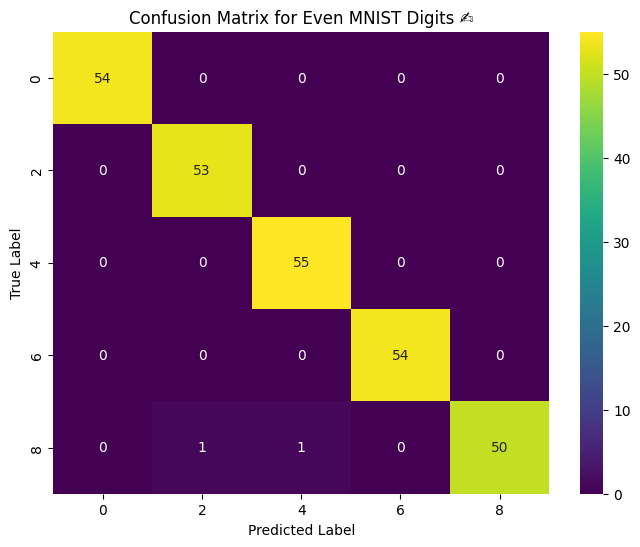


--- Final Answer ---
The number of 6's in the test set correctly classified is: 54


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


digits = datasets.load_digits()

df = pd.DataFrame(digits.data)
df['target'] = digits.target
df_even = df[df['target']%2==0]
feature_even = df_even.drop('target',axis=1)
target_even = df_even['target'].values

X_train, X_test, y_train, y_test=train_test_split(
    feature_even,target_even,
    test_size=.3, random_state=42, stratify=df_even['target'])

Knn = KNeighborsClassifier(n_neighbors = 3)
Knn.fit(X_train, y_train)

preds = Knn.predict(X_test)
# --- 5. Plot the results using a heatmap ---
# This part is also identical
cm = confusion_matrix(y_test, preds)
even_digit_labels = np.unique(target_even)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=even_digit_labels, yticklabels=even_digit_labels)
plt.title('Confusion Matrix for Even MNIST Digits ✍️')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# --- 6. Find how many 6's were correctly classified ---
idx_for_6 = np.where(even_digit_labels == 6)[0][0]
correctly_classified_6s = cm[idx_for_6, idx_for_6]

print("\n--- Final Answer ---")
print(f"The number of 6's in the test set correctly classified is: {correctly_classified_6s}")




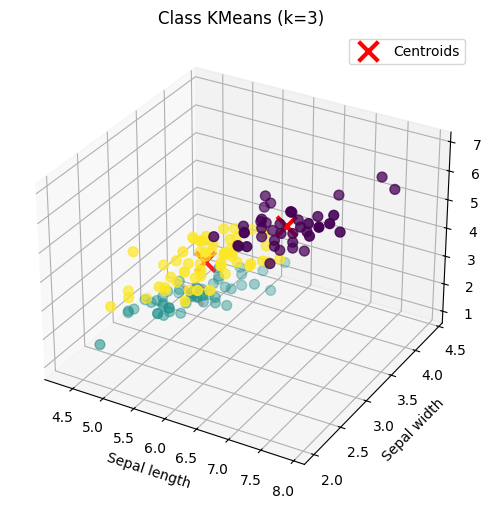

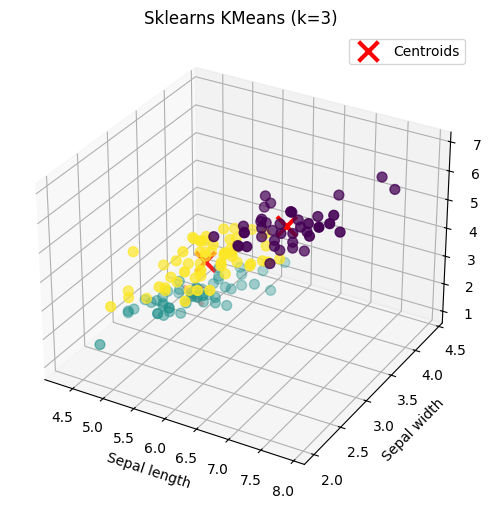

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

class K_Means:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

data = load_iris()
X = data.data[:, [0,1,2]]
y = data.target

K = 3
kmeans = K_Means(k=K)
kmeans.fit(X)
y_pred = kmeans.predict(X)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y_pred, cmap='viridis', s=50)
ax.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], kmeans.centroids[:,2],
           marker='x', s=200, linewidths=3, color='red', label='Centroids')
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal length")
ax.set_title("Class KMeans (k=3)")
ax.legend()
plt.show()

skmodel = KMeans(n_clusters=3, n_init=10, random_state=42)
preds_sklearn = skmodel.fit_predict(X)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=preds_sklearn, cmap='viridis', s=50)
ax.scatter(skmodel.cluster_centers_[:,0], skmodel.cluster_centers_[:,1], skmodel.cluster_centers_[:,2],
           marker='x', s=200, linewidths=3, color='red', label='Centroids')
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal length")
ax.set_title("Sklearns KMeans (k=3)")
ax.legend()
plt.show()


#If you were to vary K, we would get more clusters and it would be more accurate in recognizing outliers.
